In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Transformation_2.csv")
df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,...,v_Acc_preceding,Lane_ID_preceding,Space_Headway_preceding,Time_Headway_preceding,L-F_Pair,pair_Time_Duration,total_pair_duration,Vehicle_Class,Space_Gap,Difference_of_speed
0,1760,5683,243,1.113430e+12,0.953414,425.375767,6042644.327,2134449.877,6.49224,8.5,...,-3.043688,1,33.634680,1.58,1754-1760,0.0,11.6,Heavy Vehicle,36.277296,1.090135
1,1760,5682,243,1.113430e+12,0.961339,423.323483,6042645.392,2134443.458,6.49224,8.5,...,-2.833217,1,34.192464,1.56,1754-1760,0.1,11.6,Heavy Vehicle,36.030408,1.327031
2,1760,5681,243,1.113430e+12,0.969264,421.265679,6042646.466,2134436.985,6.49224,8.5,...,-2.703060,1,34.475928,1.63,1754-1760,0.2,11.6,Heavy Vehicle,35.920680,1.527489
3,1760,5680,243,1.113430e+12,0.982370,419.201729,6042647.579,2134430.379,6.49224,8.5,...,-2.366147,1,34.847784,1.64,1754-1760,0.3,11.6,Heavy Vehicle,35.832288,1.700222
4,1760,5679,243,1.113430e+12,0.988771,417.131926,6042648.745,2134423.299,6.49224,8.5,...,-1.977164,1,35.295840,1.67,1754-1760,0.4,11.6,Heavy Vehicle,35.814000,1.844612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341701,1755,7322,388,1.113438e+12,0.874166,439.571071,6042636.659,2134495.641,5.42544,8.4,...,-0.428896,1,33.086040,2.39,1749-1755,32.4,32.8,Car,16.773144,1.164830
341702,1755,7323,388,1.113438e+12,0.869594,440.984301,6042635.877,2134500.351,5.42544,8.4,...,-0.702400,1,33.278064,2.43,1749-1755,32.5,32.8,Car,16.684752,1.071146
341703,1755,7324,388,1.113438e+12,0.865937,442.401238,6042635.103,2134505.014,5.42544,8.4,...,-0.960326,1,33.521904,2.44,1749-1755,32.6,32.8,Car,16.605504,0.951025
341704,1755,7325,388,1.113438e+12,0.861974,443.822373,6042634.346,2134509.574,5.42544,8.4,...,-1.217816,1,33.677352,2.41,1749-1755,32.7,32.8,Car,16.565880,0.795200


In [3]:
df = df.drop(['Total_Frames', 'Global_Time', 'Local_X', 'Global_X', 'Global_Y','Following','Global_Time_preceding','v_Width_preceding'],axis=1)

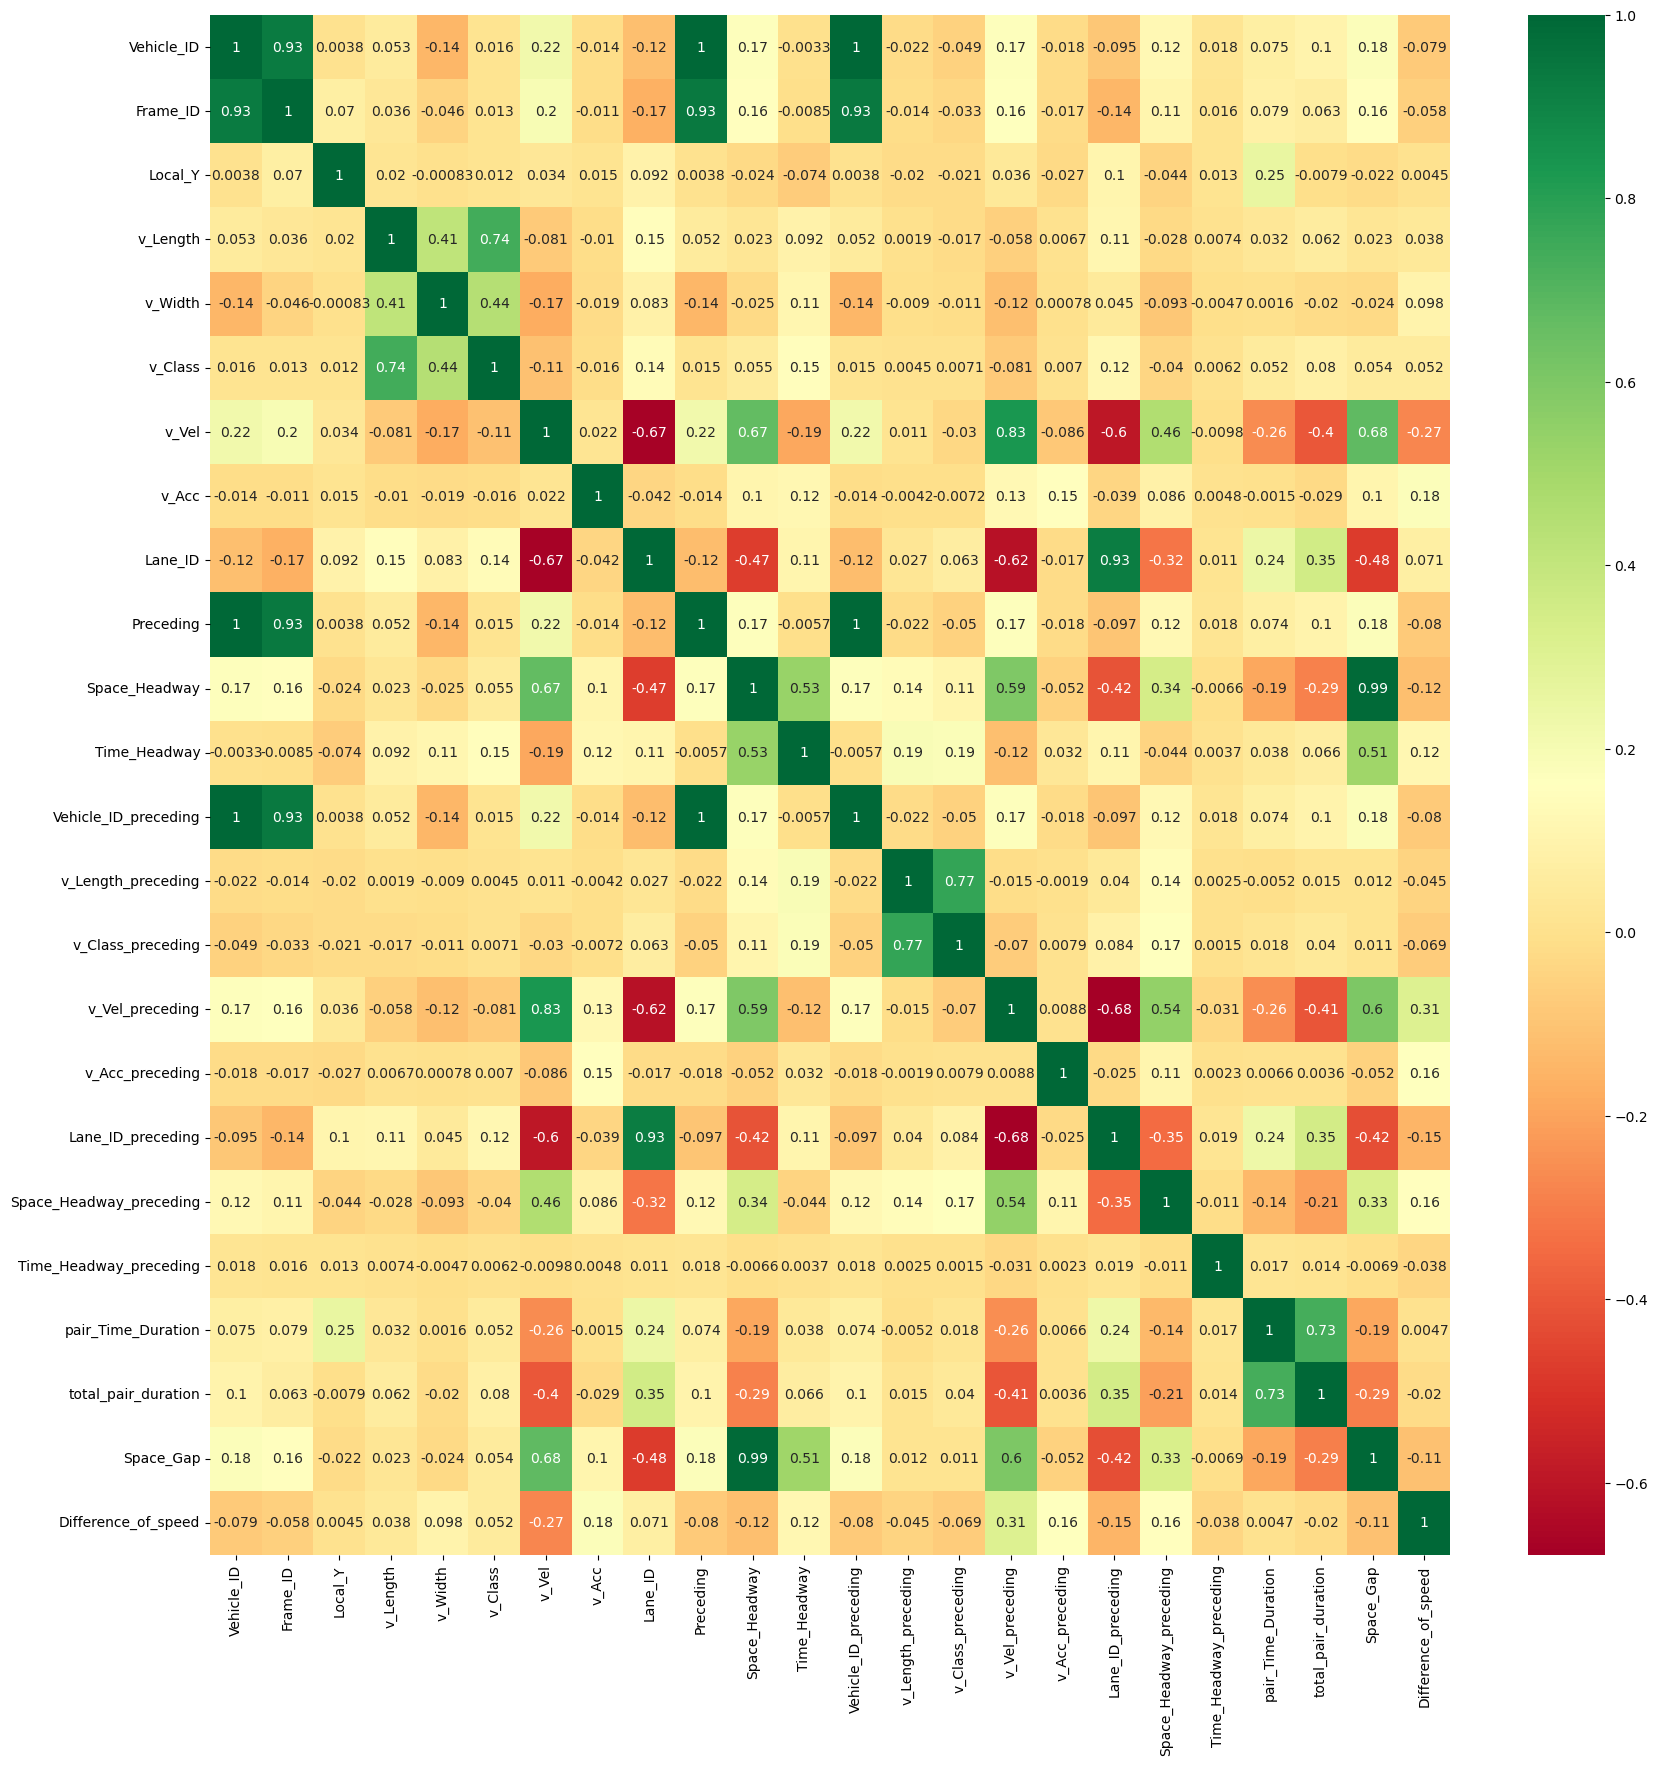

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
corr_df =df.corr()
top_corr_feature = corr_df.index

plt.figure(figsize = (20,20))

plot = sns.heatmap(df[top_corr_feature].corr() , annot = True ,  cmap = "RdYlGn" )



In [5]:
import Cleanup
clean = Cleanup.clean()

In [6]:
test_df, train_df = clean.train_test_pair(df, 0.2)
train_df.to_csv('train_df.csv')
train_df

,Vehicle_ID,Frame_ID,Local_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,...,v_Acc_preceding,Lane_ID_preceding,Space_Headway_preceding,Time_Headway_preceding,L-F_Pair,pair_Time_Duration,total_pair_duration,Vehicle_Class,Space_Gap,Difference_of_speed
0,1760,5683,425.375767,6.49224,8.5,3,20.498565,-0.283574,1,1754,...,-3.043688,1,33.634680,1.58,1754-1760,0.0,11.6,Heavy Vehicle,36.277296,1.090135
1,1760,5682,423.323483,6.49224,8.5,3,20.547120,-0.474961,1,1754,...,-2.833217,1,34.192464,1.56,1754-1760,0.1,11.6,Heavy Vehicle,36.030408,1.327031
2,1760,5681,421.265679,6.49224,8.5,3,20.608958,-0.491087,1,1754,...,-2.703060,1,34.475928,1.63,1754-1760,0.2,11.6,Heavy Vehicle,35.920680,1.527489
3,1760,5680,419.201729,6.49224,8.5,3,20.670048,-0.463286,1,1754,...,-2.366147,1,34.847784,1.64,1754-1760,0.3,11.6,Heavy Vehicle,35.832288,1.700222
4,1760,5679,417.131926,6.49224,8.5,3,20.725999,-0.777079,1,1754,...,-1.977164,1,35.295840,1.67,1754-1760,0.4,11.6,Heavy Vehicle,35.814000,1.844612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341701,1755,7322,439.571071,5.42544,8.4,2,14.113733,0.372719,1,1749,...,-0.428896,1,33.086040,2.39,1749-1755,32.4,32.8,Car,16.773144,1.164830
341702,1755,7323,440.984301,5.42544,8.4,2,14.150868,0.369981,1,1749,...,-0.702400,1,33.278064,2.43,1749-1755,32.5,32.8,Car,16.684752,1.071146
341703,1755,7324,442.401238,5.42544,8.4,2,14.187875,0.370157,1,1749,...,-0.960326,1,33.521904,2.44,1749-1755,32.6,32.8,Car,16.605504,0.951025
341704,1755,7325,443.822373,5.42544,8.4,2,14.234822,0.568790,1,1749,...,-1.217816,1,33.677352,2.41,1749-1755,32.7,32.8,Car,16.565880,0.795200


In [7]:
test_df.to_csv('test_df.csv')
test_df

,Vehicle_ID,Frame_ID,Local_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,...,v_Acc_preceding,Lane_ID_preceding,Space_Headway_preceding,Time_Headway_preceding,L-F_Pair,pair_Time_Duration,total_pair_duration,Vehicle_Class,Space_Gap,Difference_of_speed
581,1782,5567,59.774890,5.12064,6.9,2,20.365224,1.255773,1,1775,...,-0.453843,1,37.874448,2.22,1775-1782,0.0,18.5,Car,30.086808,-2.748051
582,1782,5566,57.746729,5.12064,6.9,2,20.197997,1.578270,1,1775,...,-0.413895,1,37.642800,2.31,1775-1782,0.1,18.5,Car,30.431232,-2.538095
583,1782,5568,61.817831,5.12064,6.9,2,20.493584,0.919571,1,1775,...,-0.456897,1,37.965888,2.13,1775-1782,0.2,18.5,Car,29.879544,-2.921258
584,1782,5569,63.871630,5.12064,6.9,2,20.582411,0.585813,1,1775,...,-0.420435,1,38.026848,2.18,1775-1782,0.3,18.5,Car,29.705808,-3.052821
585,1782,5571,67.996026,5.12064,6.9,2,20.641617,-0.175943,1,1775,...,-0.374093,1,38.261544,2.28,1775-1782,0.4,18.5,Car,29.239464,-3.185542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341110,1730,7172,453.287491,4.05384,6.3,2,15.539892,1.184300,1,1728,...,-2.534418,1,20.250912,1.42,1728-1730,32.6,33.0,Car,18.047208,-1.984869
341114,1730,7173,454.846683,4.05384,6.3,2,15.643935,0.896564,1,1728,...,-2.697775,1,20.031456,1.42,1728-1730,32.7,33.0,Car,18.068544,-2.350488
341127,1730,7174,456.414825,4.05384,6.3,2,15.718915,0.603036,1,1728,...,-2.850019,1,19.763232,1.43,1728-1730,32.8,33.0,Car,18.007584,-2.702821
341136,1730,7175,457.988997,4.05384,6.3,2,15.764532,0.309300,1,1728,...,-2.991125,1,19.936968,1.50,1728-1730,32.9,33.0,Car,17.861280,-3.040457


In [8]:
 def create_prediction_columns( df, n):
        '''
        create the prediction pair by shifting the actual data up by the mentioned number(0.1*n seconds) to create the timeseries info
        '''
        df["nextframeAcc"] = df.groupby(
            ["L-F_Pair"], as_index=False)["v_Acc"].shift(-1*n)
        df["nextframesvel"] = df.groupby(
            ["L-F_Pair"], as_index=False)["v_Vel"].shift(-1*n)
        df["nextframeposition"] = df.groupby(
            ["L-F_Pair"], as_index=False)["Local_Y"].shift(-1*n)
        df["nextFrameSpacing"] = df.groupby(
            ["L-F_Pair"], as_index=False)["Space_Gap"].shift(-1*n)
        df["precnextframesvel"] = df.groupby(
            ["L-F_Pair"], as_index=False)["v_Vel_preceding"].shift(-1*n)
        df = df[df['nextframeposition'].notna()]
        df = df[df['nextframesvel'].notna()]
        df = df[df['nextframeAcc'].notna()]
        df = df[df['nextFrameSpacing'].notna()]

        return df

In [9]:
train_df_5= create_prediction_columns(train_df, 5)

C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframeAcc"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframesvel"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [10]:
train_df_5

,Vehicle_ID,Frame_ID,Local_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,...,pair_Time_Duration,total_pair_duration,Vehicle_Class,Space_Gap,Difference_of_speed,nextframeAcc,nextframesvel,nextframeposition,nextFrameSpacing,precnextframesvel
0,1760,5683,425.375767,6.49224,8.5,3,20.498565,-0.283574,1,1754,...,0.0,11.6,Heavy Vehicle,36.277296,1.090135,-0.679115,20.775275,415.056862,35.911536,22.732894
1,1760,5682,423.323483,6.49224,8.5,3,20.547120,-0.474961,1,1754,...,0.1,11.6,Heavy Vehicle,36.030408,1.327031,-0.626724,20.899921,412.973103,35.856672,22.853260
2,1760,5681,421.265679,6.49224,8.5,3,20.608958,-0.491087,1,1754,...,0.2,11.6,Heavy Vehicle,35.920680,1.527489,-0.649260,20.943266,410.880943,35.728656,22.929306
3,1760,5680,419.201729,6.49224,8.5,3,20.670048,-0.463286,1,1754,...,0.3,11.6,Heavy Vehicle,35.832288,1.700222,-0.481942,20.991363,408.784212,35.661600,22.960584
4,1760,5679,417.131926,6.49224,8.5,3,20.725999,-0.777079,1,1754,...,0.4,11.6,Heavy Vehicle,35.814000,1.844612,-0.714591,21.120779,404.573626,35.585400,22.892418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341696,1755,7317,432.553507,5.42544,8.4,2,13.974013,0.180951,1,1749,...,31.9,32.8,Car,16.831056,1.133864,0.372719,14.113733,439.571071,16.773144,15.278563
341697,1755,7318,433.951878,5.42544,8.4,2,13.993415,0.207085,1,1749,...,32.0,32.8,Car,16.821912,1.212407,0.369981,14.150868,440.984301,16.684752,15.222014
341698,1755,7319,435.352370,5.42544,8.4,2,14.016417,0.252962,1,1749,...,32.1,32.8,Car,16.843248,1.254982,0.370157,14.187875,442.401238,16.605504,15.138900
341699,1755,7320,436.755413,5.42544,8.4,2,14.044461,0.307920,1,1749,...,32.2,32.8,Car,16.858488,1.260305,0.568790,14.234822,443.822373,16.565880,15.030022


In [11]:
test_df_5= create_prediction_columns(test_df, 5)

C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframeAcc"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframesvel"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [12]:
test_df_5

,Vehicle_ID,Frame_ID,Local_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,...,pair_Time_Duration,total_pair_duration,Vehicle_Class,Space_Gap,Difference_of_speed,nextframeAcc,nextframesvel,nextframeposition,nextFrameSpacing,precnextframesvel
581,1782,5567,59.774890,5.12064,6.9,2,20.365224,1.255773,1,1775,...,0.0,18.5,Car,30.086808,-2.748051,0.498161,20.631940,65.932348,29.489400,17.491718
582,1782,5566,57.746729,5.12064,6.9,2,20.197997,1.578270,1,1775,...,0.1,18.5,Car,30.431232,-2.538095,0.542989,20.468116,221.210406,33.476184,19.691504
583,1782,5568,61.817831,5.12064,6.9,2,20.493584,0.919571,1,1775,...,0.2,18.5,Car,29.879544,-2.921258,0.522266,20.412742,219.166363,33.485328,19.707401
584,1782,5569,63.871630,5.12064,6.9,2,20.582411,0.585813,1,1775,...,0.3,18.5,Car,29.705808,-3.052821,0.547157,20.357754,217.127839,33.528000,19.736794
585,1782,5571,67.996026,5.12064,6.9,2,20.641617,-0.175943,1,1775,...,0.4,18.5,Car,29.239464,-3.185542,0.628036,20.297327,215.095085,33.668208,19.777402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341071,1730,7167,445.708804,4.05384,6.3,2,14.793025,0.696094,1,1728,...,32.1,33.0,Car,17.718024,-0.205608,1.184300,15.539892,453.287491,18.047208,13.555023
341078,1730,7168,447.193501,4.05384,6.3,2,14.900917,1.461748,1,1728,...,32.2,33.0,Car,17.730216,-0.479539,0.896564,15.643935,454.846683,18.068544,13.293447
341082,1730,7169,448.691863,4.05384,6.3,2,15.066316,1.846229,1,1728,...,32.3,33.0,Car,17.785080,-0.832319,0.603036,15.718915,456.414825,18.007584,13.016094
341089,1730,7170,450.207483,4.05384,6.3,2,15.246077,1.748998,1,1728,...,32.4,33.0,Car,17.879568,-1.219674,0.309300,15.764532,457.988997,17.861280,12.724075


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
X_train = train_df_5.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_train = train_df_5['nextFrameSpacing']
X_test = test_df_5.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_test = test_df_5['nextFrameSpacing']
rf.fit(X_train, y_train)


RandomForestRegressor()

In [15]:

rf.score(X_test, y_test)

0.6659787353216444

### reaction of 1 sec 

In [17]:
train_df_10= create_prediction_columns(train_df, 10)

C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframeAcc"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframesvel"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [18]:
test_df_10= create_prediction_columns(test_df, 10)

C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframeAcc"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nextframesvel"] = df.groupby(
C:\Users\SUMIT VERMA\AppData\Local\Temp\ipykernel_23416\852587755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
rf = RandomForestRegressor()
X_train = train_df_10.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_train = train_df_10['nextFrameSpacing']
X_test = test_df_10.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_test = test_df_10['nextFrameSpacing']
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

### reaction time of 1.5 s

In [ ]:
train_df_15= create_prediction_columns(train_df, 15)

In [ ]:
test_df_15= create_prediction_columns(test_df, 15)

In [ ]:
rf = RandomForestRegressor()
X_train = train_df_15.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_train = train_df_15['nextFrameSpacing']
X_test = test_df_15.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_test = test_df_15['nextFrameSpacing']
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

### reaction time of 2s

In [ ]:
train_df_20= create_prediction_columns(train_df, 20)

In [ ]:
test_df_20= create_prediction_columns(test_df, 20)

In [ ]:
rf = RandomForestRegressor()
X_train = train_df_20.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_train = train_df_20['nextFrameSpacing']
X_test = test_df_20.drop(['nextFrameSpacing', 'Vehicle_Class', 'Location', 'Period', 'L-F_Pair'], axis = 1)
y_test = test_df_20['nextFrameSpacing']
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)